In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from file_lists import get_file_list
from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
%matplotlib inline
%run data_prep_functions.ipynb

### <font color='royalblue'> Read the data (test runs below 15 seconds)

In [2]:
file_path = "E:\POSITION DATA\PRE PROCESSED/below15_runs.csv"
below15 = pd.read_csv(file_path)

In [3]:
below15.head()

,session,rat,run_nr,start_timestamp,run_type,stim_condition,outcome,group,cp_entry_timestamp,cp_exit_timestamp,latency_to_cp_entry,latency_to_cp_exit,time_in_cp
0,2019-08-08T12_41_07,NPHR1,6.0,368.579635,T,1,1.0,NPHR,371.569088,372.640947,2.989453,4.061312,1.071859
1,2019-08-08T12_41_07,NPHR1,10.0,751.518003,T,3,1.0,NPHR,755.435469,756.431386,3.917466,4.913382,0.995917
2,2019-08-08T12_41_07,NPHR1,14.0,954.084992,T,3,0.0,NPHR,957.866982,958.900954,3.781990,4.815962,1.033971
3,2019-08-08T12_41_07,NPHR1,18.0,1151.446016,T,0,1.0,NPHR,1153.832614,1154.563149,2.386598,3.117133,0.730534
4,2019-08-08T12_41_07,NPHR1,22.0,1375.846490,T,3,1.0,NPHR,1378.606669,1379.300582,2.760179,3.454093,0.693914


In [4]:
preillum_runs = below15[below15['stim_condition']==-1]
below15 = below15[(below15['stim_condition']==0) | (below15['stim_condition']==3)]                 
below15['stim_condition'].unique()

array([3, 0], dtype=int64)

In [5]:
preillum_runs['stim_condition'].unique()

array([-1], dtype=int64)

In [6]:
counts=below15.groupby(['group','stim_condition']).count()['session']
counts

group  stim_condition
CTRL   0                  954
       3                  937
NPHR   0                 1196
       3                 1164
Name: session, dtype: int64

In [7]:
preillum_runs.groupby(['group','stim_condition']).count()['session']

group  stim_condition
CTRL   -1                544
NPHR   -1                641
Name: session, dtype: int64

## <font color='royalblue'> Latency to choice point across sessions

In [8]:
# Add session numbers to each session timestamp
def add_session_nr(group,i):
    
    session_list = np.sort(group['session'].unique())
    for session in session_list:
        group.loc[group['session']==session,'session_nr']=i
        i+=1
    return group

below15= below15.groupby(['group', 'rat']).apply(add_session_nr, 1).reset_index(drop=True)
preillum_runs = preillum_runs.groupby(['group','rat']).apply(add_session_nr, -2).reset_index(drop=True)

In [9]:
# Calculate the median latencies across sessions
medians = below15.groupby(['group','stim_condition','rat','session_nr'])['latency_to_cp_entry'].apply(np.median)
medians = medians.reset_index()

#Remove two extra sessions from NPHR6
medians = medians[medians['session_nr'].between(-2,15)]

In [10]:
below15 = pd.concat([below15, preillum_runs])
below15=below15[below15['session_nr']<=15]

<Figure size 6000x3000 with 0 Axes>

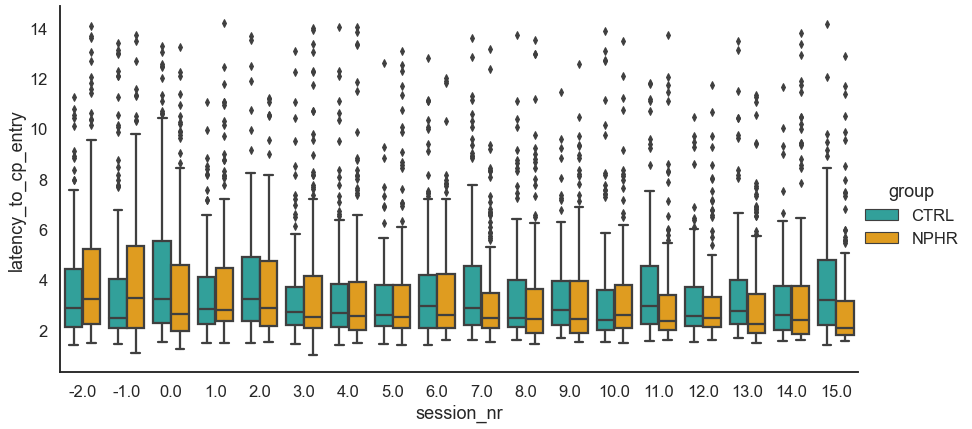

In [11]:
plt.figure(figsize=(20,10),dpi=300)
sns.set(style='white', context='talk')
g = sns.catplot(kind='box',data=below15,
                x='session_nr', y='latency_to_cp_entry', hue='group', hue_order=['CTRL','NPHR'],
                height=6, aspect=2, palette=['lightseagreen', 'orange']
                )
sns.despine()